(516, 556)

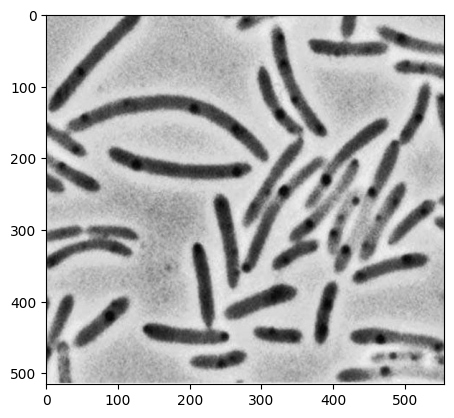

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
# importer l'image avec pyplot
image = plt.imread('bacterizz.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

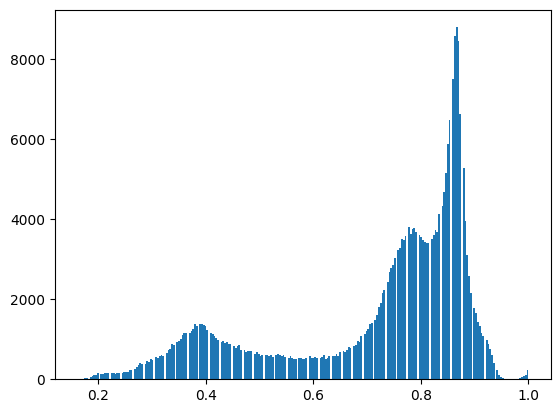

In [5]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

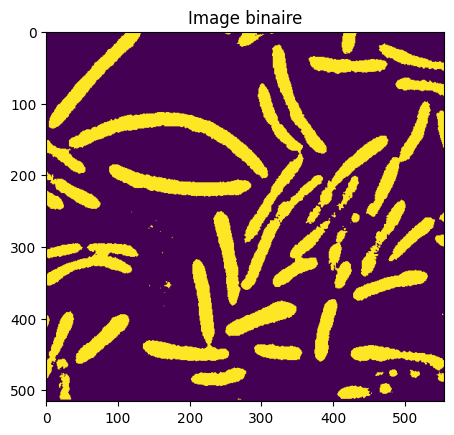

In [6]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.title("Image binaire")
plt.imshow(image)

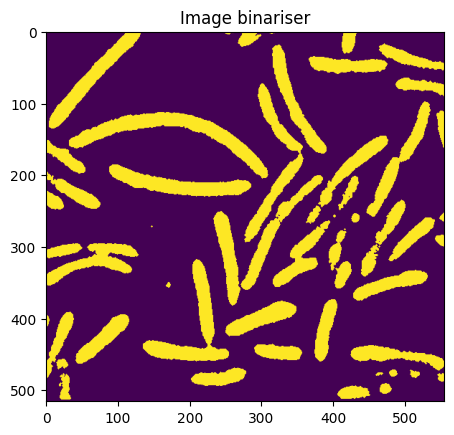

In [7]:
open_image = ndimage.binary_opening(image)
plt.title("Image binariser")
plt.imshow(open_image)

il y a 56 groupes


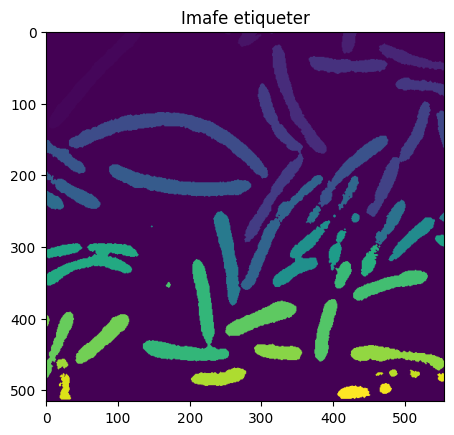

In [6]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')
plt.title("Imafe etiqueter")
plt.imshow(label_image)

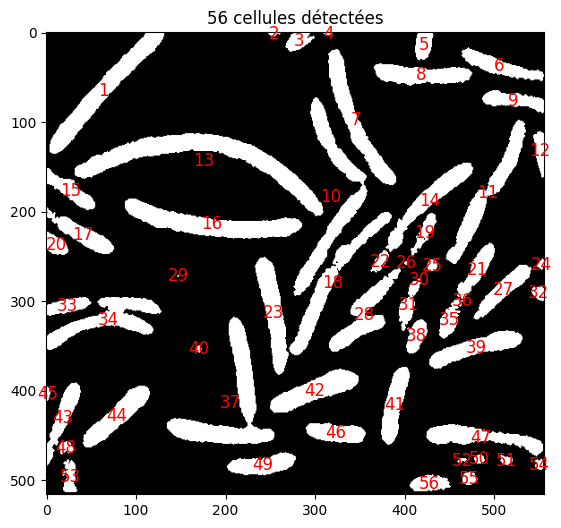

In [7]:
label_image, num_labels = ndimage.label(open_image)

plt.figure(figsize=(10,6))
plt.imshow(open_image, cmap='gray')
plt.title(f"{num_labels} cellules détectées")

centers = ndimage.center_of_mass(open_image, labels=label_image, index=range(1, num_labels+1))

for i, (y, x) in enumerate(centers):
    plt.text(x, y, str(i+1), color='red', fontsize=12, ha='center', va='center')

plt.show()

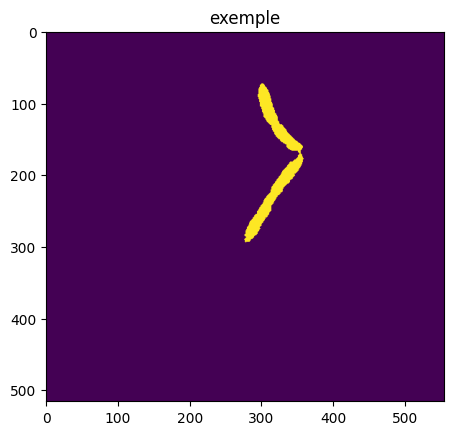

In [20]:
objet = (label_image == 10)
plt.title("exemple")
plt.imshow(objet)

In [13]:
sizes = ndimage.sum(open_image, label_image, index=range(1, n_labels+1))  # somme des pixels True
sizes = np.array(sizes, dtype=int)

print("Tailles des groupes (pixels):")
print(sizes)
print(f"Taille min: {sizes.min()}, max: {sizes.max()}, médiane: {np.median(sizes)}")

Tailles des groupes (pixels):
[3315   44  452   29  511 1306 2703 1843  967 3709 2743  415 5729 2063
  961 3819 1268 2739  487  442  977  254 2317   62  119   12 1218 2182
    5    5  609  172  657 2803  611    5 4290  591 1848   36 1499 2182
 1196 1821   59 1146 2020  169 1274   91  106   35  416   92  191  638]
Taille min: 5, max: 5729, médiane: 647.5


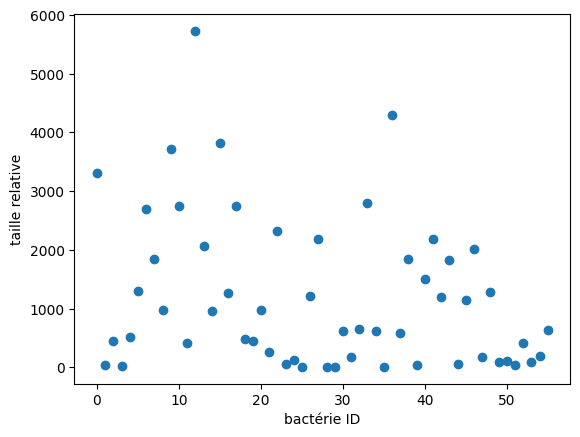

In [18]:
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()